<a href="https://colab.research.google.com/github/imaginaryBuddy/tripleH/blob/main/tripleHProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TripleH's Project**
#####Dataset : IMDB 5000 Dataset from Kaggle
######Question : If we were directors of a movie, how can we maximise our movie's success rate ? 


In [ ]:
# Sandhiya Sukumaran U2120682B
# Koh Zi En U2122351K
# Yap Shen Hwei U2140630E

In [ ]:
# importing libraries 
import numpy as np
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt 
sb.set() 


# General utility functions


```


# 1. remove_outlier2(df_in, col)
      - returns another df without outliers
      - usage eg: duration = remove_outlier(duration, "duration")

# 3. 
```





In [ ]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    low  = q1-1.5*iqr
    high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] >= low) & (df_in[col_name] <= high)]
    return df_out

# Dataset : IMDB 5000

In [ ]:
# importing the dataset from github 
url = 'https://raw.githubusercontent.com/imaginaryBuddy/tripleH/main/movie_metadata.csv'
imdbData = pd.read_csv(url)
imdbData.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
# description of data 

## to be written with the description of each variable! 

## Splitting the dataset

In [ ]:
# split the whole dataset into train and test 
from sklearn.model_selection import train_test_split 

train_data, test_data = train_test_split(imdbData, test_size = 0.2, random_state = 55)

# let's see what we have here in our train and test datasets 
print("Train Dataset : ")
print("Data type : ", type(train_data))
print("Data dims : ", train_data.shape)
print('-------------------------------------------------------')
print("Test Dataset : ")
print("Data type : ", type(test_data))
print("Data dims : ", test_data.shape)


Train Dataset : 
Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (4034, 28)
-------------------------------------------------------
Test Dataset : 
Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (1009, 28)


In [ ]:
# rename the test dataset for simplicity 
imdb = train_data
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456
3919,Color,Alfred Hitchcock,50.0,127.0,13000.0,148.0,John Vernon,204.0,NaN,Drama|Thriller,...,89.0,English,USA,M,4000000.0,1969.0,187.0,6.3,1.85,414
4851,Color,Craig Zobel,286.0,90.0,25.0,235.0,Matt Servitto,601.0,318622.0,Biography|Crime|Drama|Thriller,...,175.0,English,USA,R,270000.0,2012.0,260.0,6.4,2.35,0
1974,Color,Catherine Hardwicke,119.0,107.0,308.0,872.0,Michael Angarano,13000.0,11008432.0,Biography|Drama|Sport,...,194.0,English,USA,PG-13,25000000.0,2005.0,947.0,7.1,1.85,5000
1756,Color,Adam McKay,426.0,130.0,285.0,767.0,Christian Bale,33000.0,70235322.0,Biography|Comedy|Drama|History,...,374.0,English,USA,R,28000000.0,2015.0,23000.0,7.8,2.35,99000


In [ ]:
from google.colab import drive
drive.mount('drive', force_remount = True)
imdb.to_csv('imdbTrain.csv')
!cp imdbTrain.csv "drive/My Drive/SC1015 Project TripleH/"

Mounted at drive
cp: cannot create regular file 'drive/My Drive/SC1015 Project TripleH/': Not a directory


In [ ]:
print(imdb.dtypes)

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [ ]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4034 entries, 5042 to 4557
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      4019 non-null   object 
 1   director_name              3951 non-null   object 
 2   num_critic_for_reviews     3995 non-null   float64
 3   duration                   4022 non-null   float64
 4   director_facebook_likes    3951 non-null   float64
 5   actor_3_facebook_likes     4019 non-null   float64
 6   actor_2_name               4024 non-null   object 
 7   actor_1_facebook_likes     4028 non-null   float64
 8   gross                      3314 non-null   float64
 9   genres                     4034 non-null   object 
 10  actor_1_name               4028 non-null   object 
 11  movie_title                4034 non-null   object 
 12  num_voted_users            4034 non-null   int64  
 13  cast_total_facebook_likes  4034 non-null   in

Let's extract the Variables & perform EDA ! 

#Univariate EDA


## 1. director_name
   the most frequently appeared names: 
```
  Clint Eastwood          18
  Woody Allen             18
  Steven Spielberg        16
  Renny Harlin            14
  Ridley Scott            13
  Steven Soderbergh       13

```

In [ ]:
director_name = pd.DataFrame(imdb["director_name"])
director_name.describe()

,director_name
count,3951
unique,2073
top,Clint Eastwood
freq,18


In [ ]:
director_name.value_counts().head(30)

director_name       
Clint Eastwood          18
Woody Allen             18
Steven Spielberg        16
Renny Harlin            14
Ridley Scott            13
Steven Soderbergh       13
Sam Raimi               12
Tim Burton              12
Martin Scorsese         12
Ron Howard              12
Shawn Levy              11
Spike Lee               11
Richard Donner          11
Oliver Stone            11
Joel Schumacher         11
Robert Zemeckis         10
John Carpenter          10
Robert Rodriguez        10
Brett Ratner            10
Tony Scott              10
Kevin Smith             10
Wes Craven              10
Francis Ford Coppola    10
David Fincher            9
Tyler Perry              9
Chris Columbus           9
Peter Jackson            9
Michael Bay              9
John McTiernan           9
Rob Cohen                9
dtype: int64

## 2. num_critic_for_reviews
a large proportion of movies receive only a few (close to 0) critic reviews 

In [ ]:
num_critic = pd.DataFrame(imdb[["movie_title", "num_critic_for_reviews"]]).dropna(how = "any", axis = 0)
num_critic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3995 entries, 5042 to 4557
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   movie_title             3995 non-null   object 
 1   num_critic_for_reviews  3995 non-null   float64
dtypes: float64(1), object(1)
memory usage: 93.6+ KB


In [ ]:
num_critic.sort_values("num_critic_for_reviews", ascending = False)

,movie_title,num_critic_for_reviews
3,The Dark Knight Rises,813.0
296,Django Unchained,765.0
30,Skyfall,750.0
3493,Skyfall,750.0
128,Mad Max: Fury Road,739.0
...,...,...
4630,A Fine Step,1.0
3973,Down for Life,1.0
4954,The Work and the Story,1.0
4163,Sardaar Ji,1.0


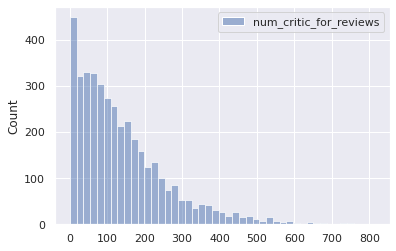

In [ ]:
sb.histplot(data = num_critic)

## 3. duration
50% of all movies lie around 95 ~ 117 minutes

In [ ]:
duration = pd.DataFrame(imdb["duration"]).dropna(how = "any", axis = 0)
duration.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4022 entries, 5042 to 4557
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duration  4022 non-null   float64
dtypes: float64(1)
memory usage: 62.8 KB


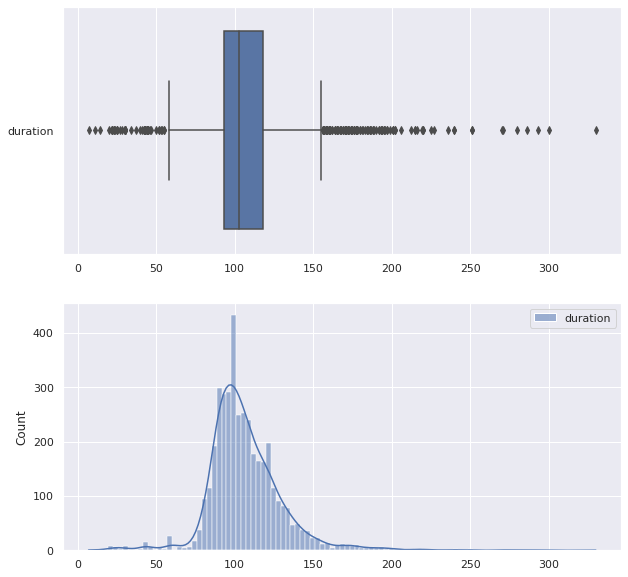

In [ ]:
f , axes = plt.subplots (2,1, figsize = (10,10))
sb.boxplot(data = duration, orient = "h", ax = axes[0])
sb.histplot(data = duration, kde = True, ax = axes[1])

In [ ]:
# removing outliers from the duration data 
q1 = duration.quantile(0.25)
q3 = duration.quantile(0.75)
IQR = q3-q1
lower = q1 - 1.5 * IQR 
upper = q3 + 1.5 * IQR
duration_clean= duration[~((duration < (q1 - 1.5 * IQR)) |(duration > (q3 + 1.5 * IQR))).any(axis=1)]
duration_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3834 entries, 5042 to 4557
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duration  3834 non-null   float64
dtypes: float64(1)
memory usage: 59.9 KB


In [ ]:
duration_clean.describe()

,duration
count,3834.000000
mean,105.389932
std,16.820037
min,58.000000
25%,93.000000
50%,103.000000
75%,116.000000
max,155.000000


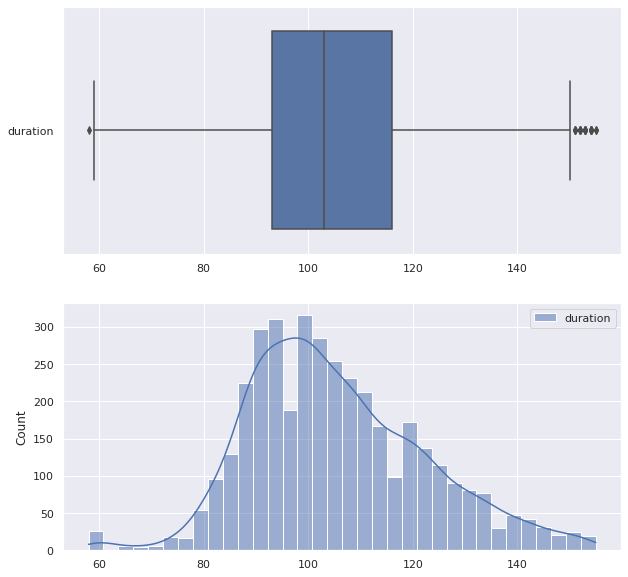

In [ ]:
f , axes = plt.subplots (2,1, figsize = (10,10))
sb.boxplot(data = duration_clean, orient = "h", ax = axes[0])
sb.histplot(data = duration_clean, kde = True, ax = axes[1])

## 4. director_facebook_likes

like duration, data is very skewed to the left, this could be due to the fact that most directors dont get recognition that much. 

perhaps, we would have to extract a portion of the data for to analyse in the future 

In [ ]:
director_likes = pd.DataFrame(imdb["director_facebook_likes"]).dropna(axis = 0, how = "any")
director_likes.info()
len1 = len(imdb)
len2 = len(director_likes)
print("# of NaN: ", len1-len2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3951 entries, 5042 to 4557
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   director_facebook_likes  3951 non-null   float64
dtypes: float64(1)
memory usage: 61.7 KB
# of NaN:  83


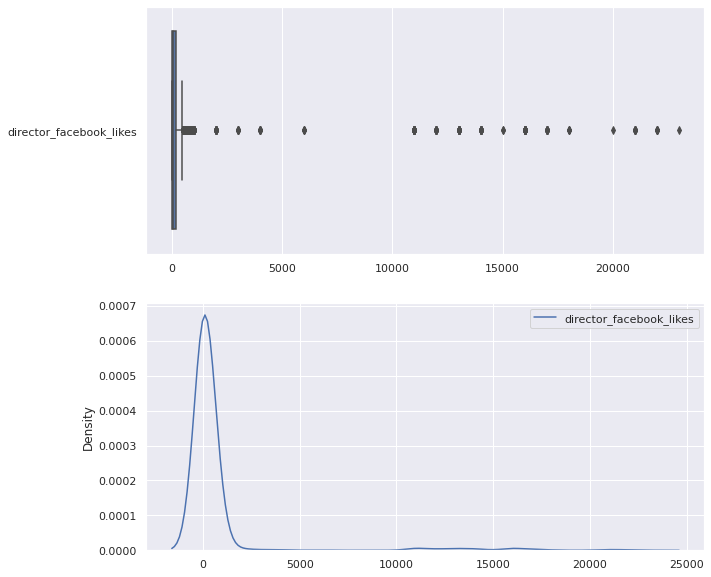

In [ ]:
f , axes = plt.subplots (2,1, figsize = (10,10))
sb.boxplot(data = director_likes, orient = "h", ax = axes[0])
sb.kdeplot(data = director_likes, ax = axes[1])

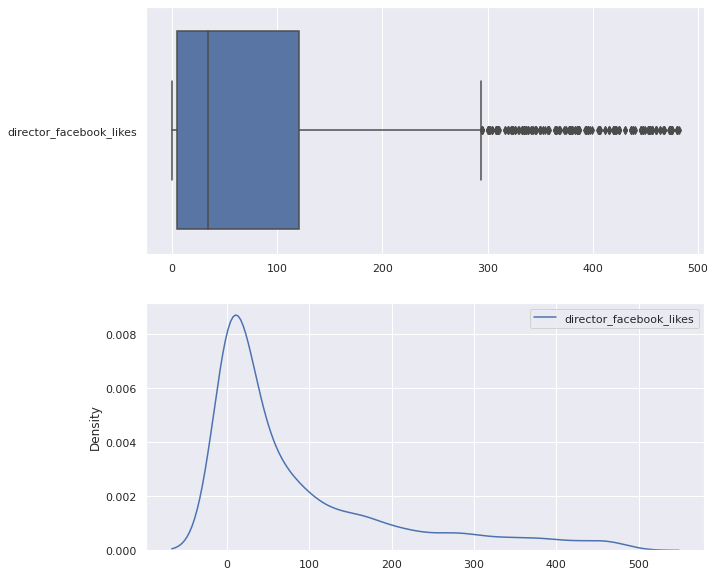

In [ ]:
director_likes_clean = remove_outlier(director_likes, "director_facebook_likes")
f , axes = plt.subplots (2,1, figsize = (10,10))
sb.boxplot(data = director_likes_clean, orient = "h", ax = axes[0])
sb.kdeplot(data = director_likes_clean, ax = axes[1])

## 4. most frequently acted actor/ actress
concatenate data from actor_1_facebook_likes, actor_2_facebook_likes, actor_3_facebook_likes

# 5. genres
most common genre : Drama 
we asked ourselves, why? is it because it is the most profitable?

## 1. Gross

In [ ]:
gross = pd.DataFrame(imdb["gross"])
gross.head()

,gross
5042,85222.0
3919,NaN
4851,318622.0
1974,11008432.0
1756,70235322.0


In [ ]:
print ("Data type : ", type(gross))
print ("Data dims : ", gross.size)
print()
gross.info()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  4034

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4034 entries, 5042 to 4557
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gross   3314 non-null   float64
dtypes: float64(1)
memory usage: 63.0 KB


In [ ]:
gross_clean = gross.copy()
gross_clean.dropna(axis = 0, inplace = True)
gross_clean.head()

,gross
5042,85222.0
4851,318622.0
1974,11008432.0
1756,70235322.0
465,91188905.0


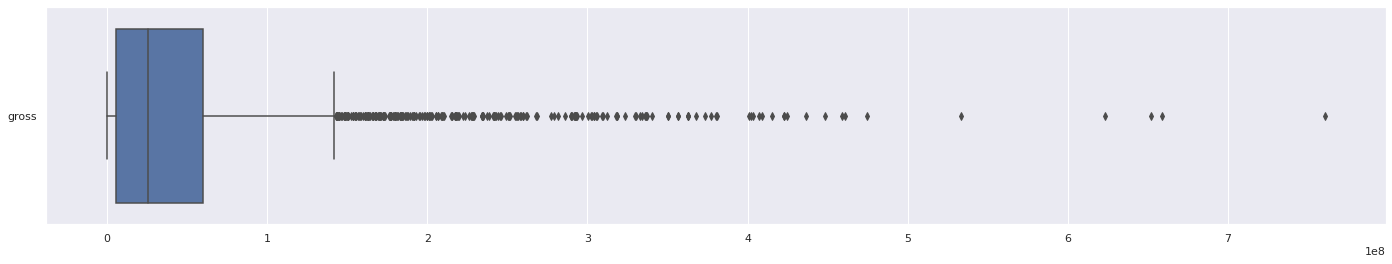

In [ ]:
f , axes = plt.subplots(figsize = (24,4))
sb.boxplot(data = gross_clean, orient = 'h')

In [ ]:
# describe 
gross_clean.describe()

,gross
count,3.314000e+03
mean,4.829659e+07
std,6.931895e+07
min,1.620000e+02
25%,5.369830e+06
50%,2.558740e+07
75%,6.004928e+07
max,7.605058e+08


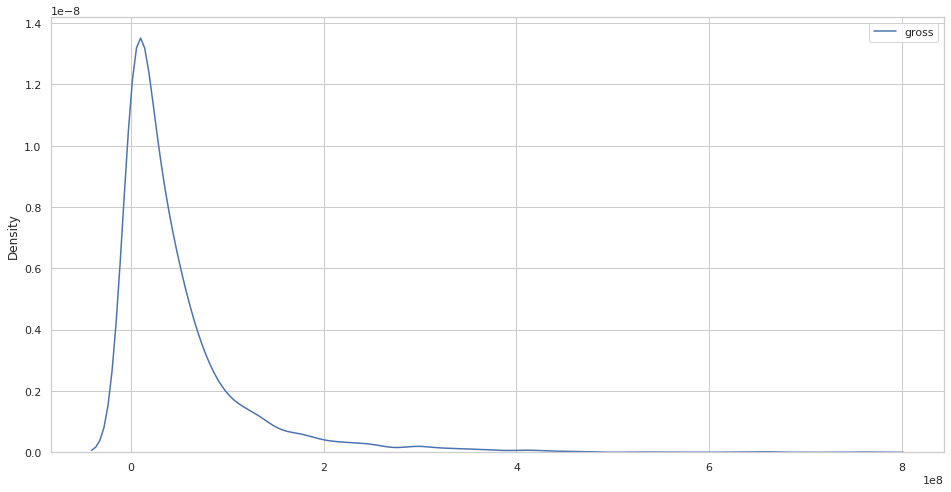

In [ ]:
f = plt.figure(figsize=(16,8))
sb.set_style("whitegrid")
sb.kdeplot(data = gross_clean)
# need to think of a way to create more grid lines 

In [ ]:
# looks positively skewed, and a lot of outliers, but we are not going to remove them, 
# because these outliers may be telling us the secret to become successful
print ("skewness : ", gross_clean.skew())

skewness :  gross    3.218972
dtype: float64


## 2. imdb_score (no missing values)

In [ ]:
imdb_score = pd.DataFrame(imdb["imdb_score"])
imdb_score.head()

,imdb_score
5042,6.6
3919,6.3
4851,6.4
1974,7.1
1756,7.8


In [ ]:
imdb_score.info()
imdb_score.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4034 entries, 5042 to 4557
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   imdb_score  4034 non-null   float64
dtypes: float64(1)
memory usage: 63.0 KB


,imdb_score
count,4034.000000
mean,6.434829
std,1.137586
min,1.600000
25%,5.800000
50%,6.600000
75%,7.200000
max,9.500000


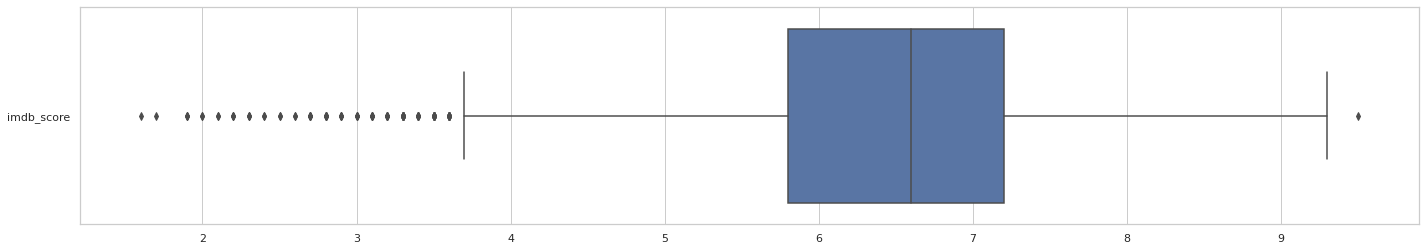

In [ ]:
f, axes = plt.subplots(1,1, figsize =(24,4))
sb.boxplot(data = imdb_score, orient = 'h')

let's bin the variable (imdb_score) into categories


## 20. language

In [101]:
language = pd.DataFrame(imdb['language'])
language.describe()

,language
count,4026
unique,44
top,English
freq,3761


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


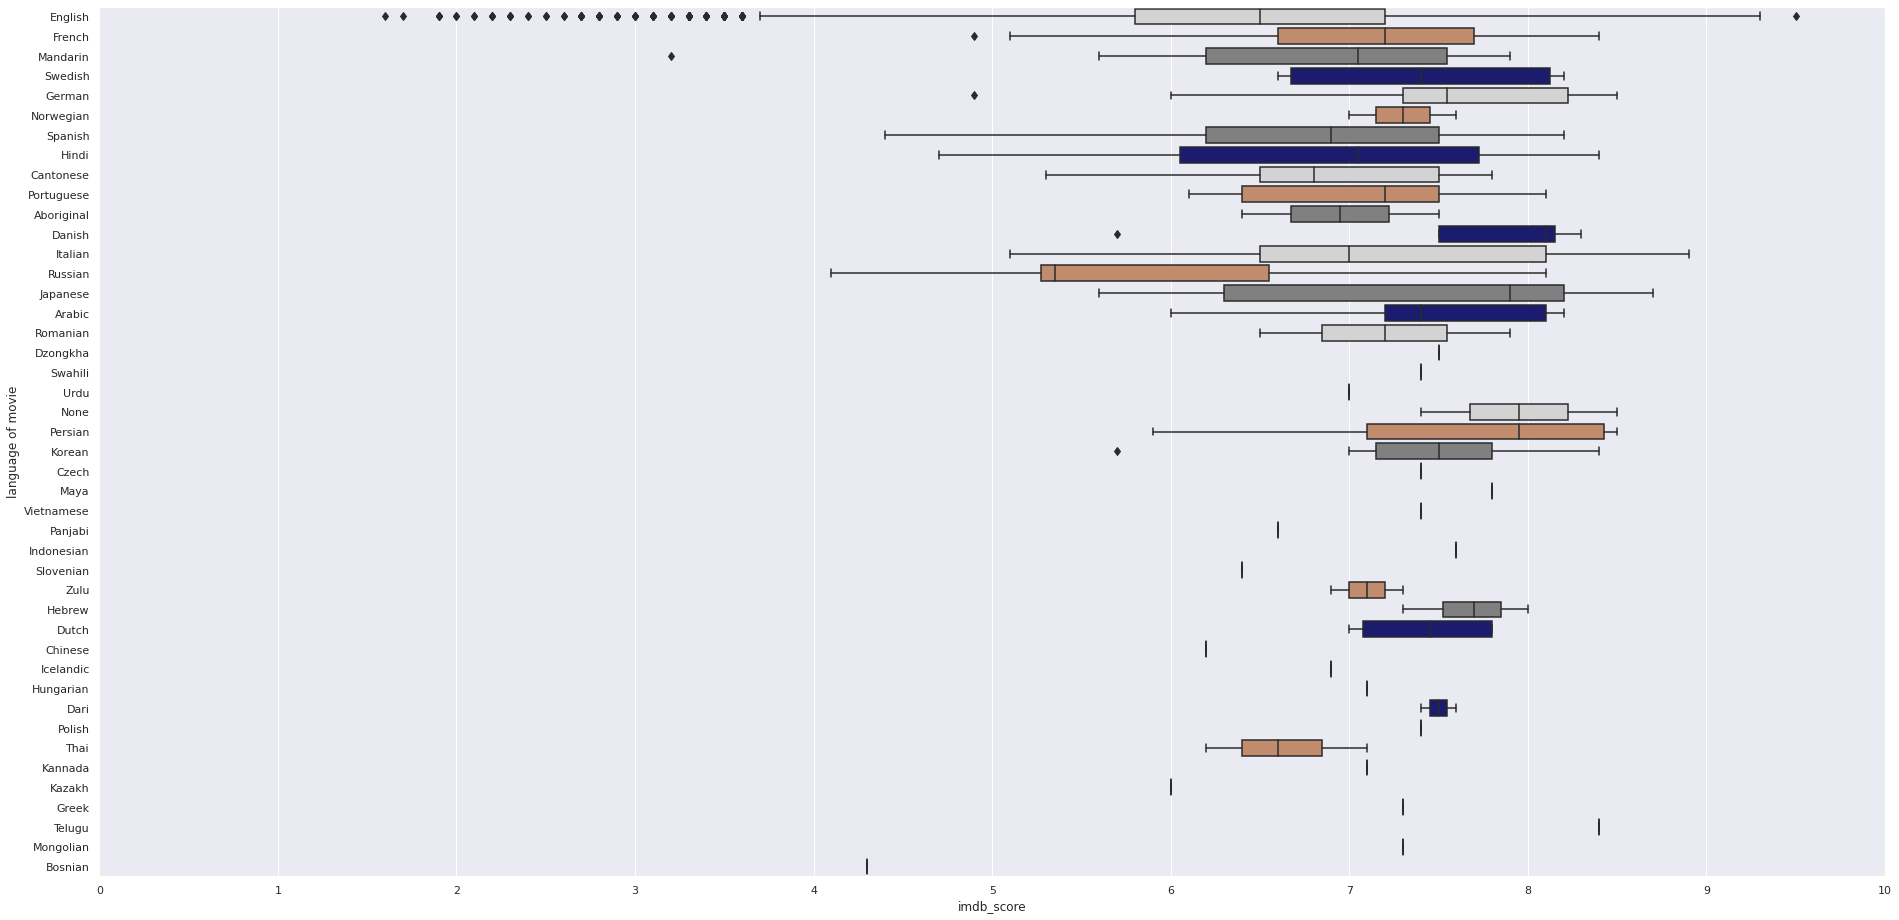

In [102]:
plt.figure(figsize=(32,16))
p = sb.boxplot("imdb_score", "language", data = imdb, saturation = .6, fliersize = 6., palette = ["lightgray", sb.color_palette()[1], "grey", "darkblue"])
_ = p.set(xlabel = "imdb_score", ylabel = "language of movie", xticks = range(11))

# Note: some of the languages do not have a boxplot as there is only 1 movie in the dataset from that language.

We will not be using language as a predictor of success because the dataset for language is highly imbalanced, with english dominating 3761 out of 4034 movies.



## 21. Country

In [ ]:
country = pd.DataFrame(imdb['country'])
country.describe()

,country
count,4029
unique,61
top,USA
freq,3026


**UNIVARIATE EDA NOT DONE YET, BUT I MOVING ON TO SEE IF THERE ARE ANY RELATIONSHIPS **

#Bivariate EDA 

1. duration vs imdbscore 

In [ ]:
imdb_dur= pd.DataFrame(imdb["duration"])
imdb_dur.head()

,duration
5042,90.0
3919,127.0
4851,90.0
1974,107.0
1756,130.0


In [ ]:
durVsImdb=pd.concat([imdb_dur,imdb_score], axis=1).reindex(imdb_dur.index)
durVsImdb.head()


,duration,imdb_score
5042,90.0,6.6
3919,127.0,6.3
4851,90.0,6.4
1974,107.0,7.1
1756,130.0,7.8


In [ ]:
durVsImdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4034 entries, 5042 to 4557
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   duration    4022 non-null   float64
 1   imdb_score  4034 non-null   float64
dtypes: float64(2)
memory usage: 223.6 KB


In [ ]:
newDurImdb=durVsImdb.dropna(axis = 0, how ='any')
newDurImdb.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 4022 entries, 5042 to 4557
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   duration    4022 non-null   float64
 1   imdb_score  4022 non-null   float64
dtypes: float64(2)
memory usage: 94.3 KB


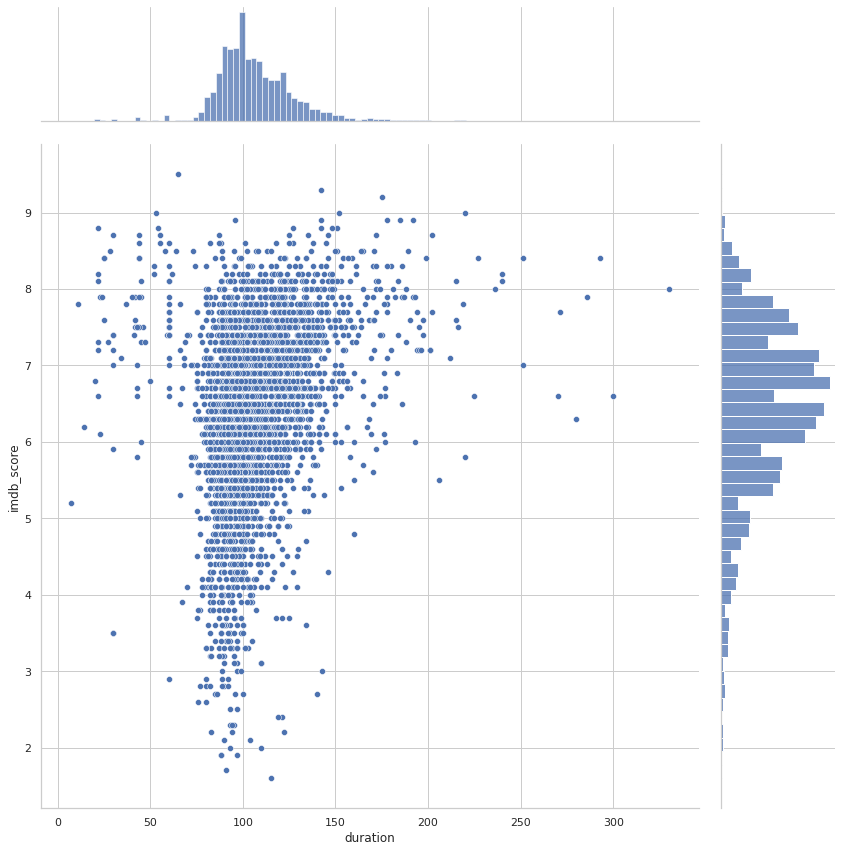

In [ ]:
sb.jointplot(data=newDurImdb,x="duration", y="imdb_score", height =12)

In [ ]:
newDurImdb.corr()

,duration,imdb_score
duration,1.000000,0.269649
imdb_score,0.269649,1.000000


Correlation between duration of movie and imdb_score is 0.27
-> low correlation

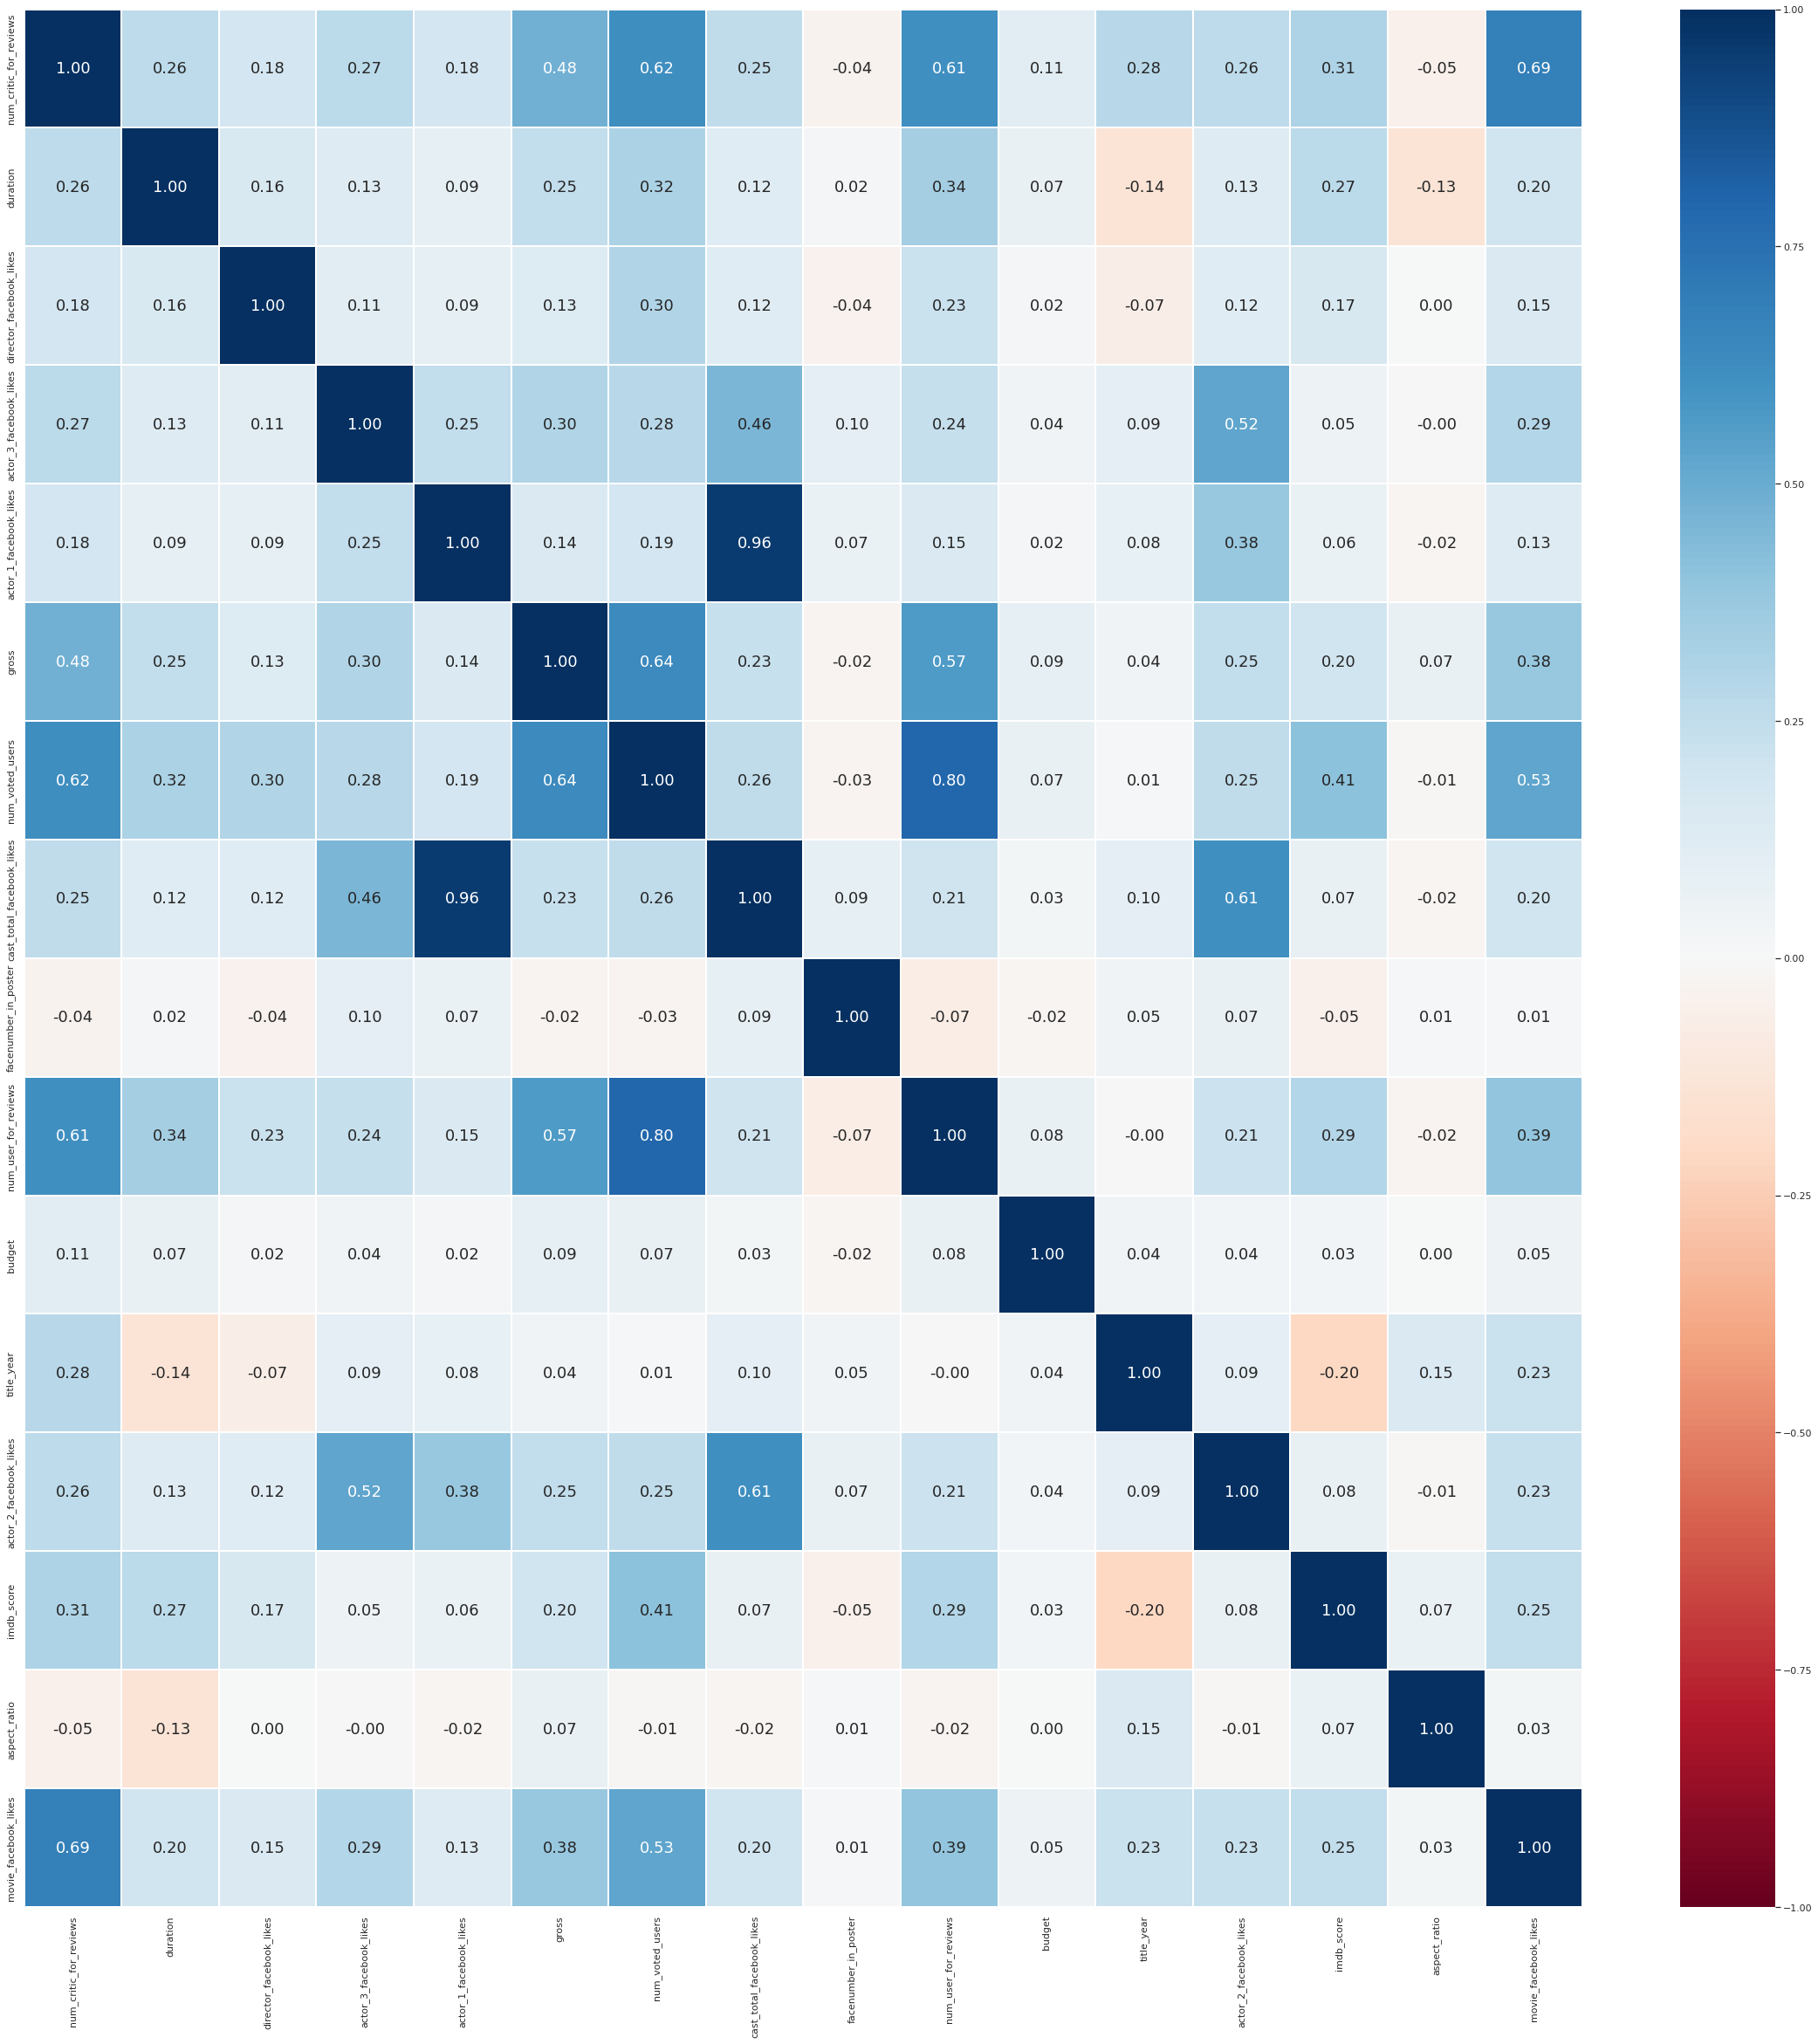

In [ ]:
# Create a new DataFrame with all the relevant variables included
New_DF = pd.DataFrame(imdb[["director_name", "num_critic_for_reviews", "duration", "director_facebook_likes", 
                            "actor_3_facebook_likes", "actor_2_name", "actor_1_facebook_likes", "gross", "genres", "actor_1_name",
                            "num_voted_users", "cast_total_facebook_likes", "actor_3_name", "facenumber_in_poster", "plot_keywords",
                            "num_user_for_reviews", "language", "country", "content_rating", "budget", "title_year", "actor_2_facebook_likes",
                            "imdb_score", "aspect_ratio", "movie_facebook_likes"]])

# Correlation Matrix
# print(New_DF.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(40, 40))
sb.heatmap(New_DF.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

From the heat map it seems like some variables affecting imdb_score are:
- num_critic_for_reviews
- duration
- num_voted_users
- num_user_for_reviews
- movie_facebook likes

Although their indivdual correlation values are objective moderate, it is higher and more significant compared to the other variables.

#Machine learning and model building

Let's perform some data cleaning first!

In [ ]:
# remove duplicates
# imdb.drop_duplicates(subset=['movie_title'], keep='first', inplace=True)
# imdb.info()
# keep='first' drops duplicates except for the first occurence

In [ ]:
# here, we see that there are missing values in different variables. 
## dk what to talk about here, will fill it in some day 

# seems like we can use movie_facebook_likes, num_user_for_reviews (etc, will type out more to refine this) to determine its popularity 
# content_rating, imdb_score, gross as measures of success rate?

In [ ]:
# dropping samples with null values
# imdb.dropna(inplace=True)
# imdb.info()

In [ ]:
# encoding the cat variables
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
#cat_list=['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name', 'actor_3_name',
          # 'plot_keywords','language', 'country', 'content_rating','title_year', 'aspect_ratio']
# imdb[cat_list]=imdb[cat_list].apply(lambda x:le.fit_transform(x))
# imdb.head()